In [ ]:
from geneticAlgorithm import main,affichage
from testData import data_TSPLIB,tour_optimal
from distance import matrice_distance

# Initialisation du data frame avec TSPLIB
# data = dataTSPLIB('data/att48.txt')
data = data_TSPLIB()

# Initialisation de la matrice des distances relatives
matDistance = matrice_distance(data)

# Chemin le plus court
chemin = tour_optimal()
#Lancement de l'algorithme génétique
res=main(data,matDistance,chemin)
affichage(res,data)

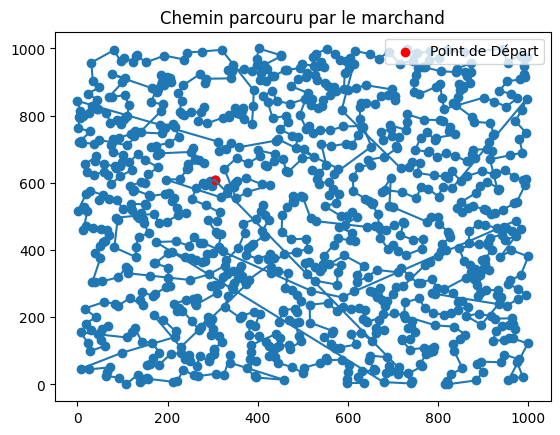

In [6]:
from testData import trajet_en_df
from graph import representation_itineraire
from plusProcheVoisin import plus_proche_voisin
from randomData import init_random_df
from distance import matrice_distance

#data = dataTSPLIB()
data=init_random_df(1000)

# Initialisation de la matrice des distances relatives
matDistance = matrice_distance(data)
itineraire=plus_proche_voisin(data,matDistance)
representation_itineraire(trajet_en_df(itineraire, data))

In [7]:
from algo2Opt import main
from testData import data_TSPLIB, tour_optimal, trajet_en_df
from graph import affichage, representation_itineraire
from randomData import init_random_df
from distance import matrice_distance,distance_trajet
from plusProcheVoisin import plus_proche_voisin 

# Initialisation du data frame avec TSPLIB
data = data_TSPLIB('../data/ts225.txt')
#data = data_TSPLIB()
#data=init_random_df(100)

# Initialisation de la matrice des distances relatives
mat_distance = matrice_distance(data)

# Chemin le plus court
chemin = tour_optimal('../data/ts225_opt_tour.txt')
#chemin = tour_optimal()

#Affichage du trajet optimal
#representation_itineraire(trajet_en_df(chemin,data))
#print(distance_trajet(chemin,mat_distance))

# On prend un chemin initial meilleur qu'un chemin aléatoire
cheminInitial=plus_proche_voisin(data,mat_distance)

#Lancement de l'algorithme 2-opt
res=main(mat_distance,cheminInitial,chemin)
affichage(res,data)
#print(distance_trajet(res['Chemins'][-1],mat_distance))

IndexError: list index out of range

In [1]:
# Test algorithme 2-opt

from testTSPLIB import test_global

resultats_test=test_global()

ValueError: could not convert string to float: ''

0 msec
145 msec
262 msec
402 msec
565 msec
11500.5


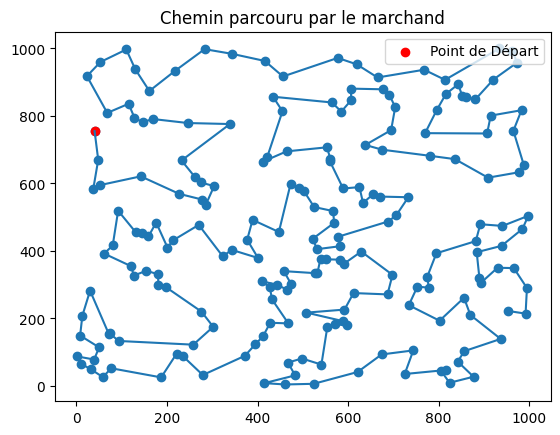

In [4]:
from py2opt.routefinder import RouteFinder
from distance import matrice_distance
from randomData import init_random_df
from graph import representation_itineraire
from testData import trajet_en_df

cities_names=[i for i in range(200)]
data=init_random_df(200)

# Initialisation de la matrice des distances relatives
matDistance = matrice_distance(data)
route_finder = RouteFinder(matDistance, cities_names, iterations=5)
best_distance, best_route = route_finder.solve()

print(best_distance)
representation_itineraire(trajet_en_df(best_route, data))